In [38]:
# ‰ΩøÁî®sklearnÁöÑÂáΩÊï∞Êù•Ëé∑ÂèñMNISTÊï∞ÊçÆÈõÜ
from sklearn.datasets import fetch_openml
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# ‰∏∫‰∫ÜÊòæÁ§∫‰∏≠Êñá
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

ÊîØÊåÅÂêëÈáèÊú∫ÊòØ‰∏Ä‰∏™ÂäüËÉΩÂº∫Â§ßÂπ∂‰∏îÂÖ®Èù¢ÁöÑÊú∫Âô®Â≠¶‰π†Ê®°ÂûãÔºåÂÆÉÂèØ‰ª•ÊâßË°åÁ∫øÊÄßÊàñËÄÖÈùûÁ∫øÊÄßÂàÜÁ±ªÔºåÂõûÂΩíÁîöËá≥ÂºÇÂ∏∏Ê£ÄÊµã‰ªªÂä°„ÄÇSVMÁâπÂà´ÈÄÇÁî®‰∫é‰∏≠Â∞èÂûãÂ§çÊùÇÊï∞ÊçÆÈõÜÁöÑÂàÜÁ±ª„ÄÇ

# Á∫øÊÄßSVMÂàÜÁ±ª

In [39]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Ëé∑ÂèñÂÜ≥Á≠ñËæπÁïåÁöÑwÂíåb
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    # Áîª‰∏≠Èó¥ÁöÑÁ≤óÁ∫ø
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # ËÆ°ÁÆóÈó¥Èöî
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    # Ëé∑ÂèñÊîØÊåÅÂêëÈáè
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

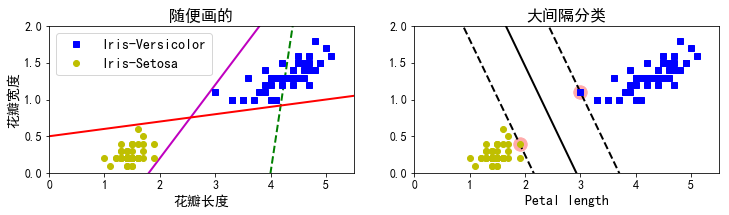

In [4]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
# Èöè‰æøÁîªÁöÑ
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.title("Èöè‰æøÁîªÁöÑ", fontsize=16)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Ëä±Áì£ÈïøÂ∫¶", fontsize=14)
plt.ylabel("Ëä±Áì£ÂÆΩÂ∫¶", fontsize=14)

plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.title("Â§ßÈó¥ÈöîÂàÜÁ±ª", fontsize=16)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

‰ª•È∏¢Â∞æËä±Êï∞ÊçÆ‰∏∫‰æãÔºå‰∏∫‰∫Ü‰æø‰∫éËØ¥ÊòéÔºåÊàë‰ª¨ÈÄâÊã©‰∏§‰∏™ÁâπÂæÅÊù•ÂÅö‰∫åÁª¥Âπ≥Èù¢ÁöÑÊï∞ÊçÆÂàÜÂâ≤ÔºåÂ∑¶ËæπÊòæÁ§∫‰∫ÜÂèØËÉΩÁöÑ‰∏âÁßçÁ∫øÊÄßÂàÜÁ±ªÂô®ÁöÑÂÜ≥Á≠ñËæπÁïåÔºåÂèØ‰ª•ÁúãÂà∞ÁªøËâ≤ÁöÑËôöÁ∫øË°®Áé∞ÈùûÂ∏∏Á≥üÁ≥ïÔºåËÄåÂÖ∂‰Ωô‰∏§‰∏™ÂàôËæÉÂ•ΩÁöÑÂÆåÊàê‰∫Ü‰ªªÂä°„ÄÇ‰ΩÜÊòØÂÆÉ‰ª¨ÁöÑÂÜ≥Á≠ñËæπÁïåÂíåÂÆû‰æãËøá‰∫éÊé•ËøëÔºåÂØºËá¥Âú®È¢ÑÊµãÊñ∞ÁöÑÂÆû‰æãÊó∂ÂÄôÔºåÂèØËÉΩË°®Áé∞‰∏çÂ•ΩÔºå‰πüÂ∞±ÊòØËøáÊãüÂêà„ÄÇÁõ∏ÊØî‰πã‰∏ãÔºåÂè≥‰æßÁöÑÂÆûÁ∫ø‰ª£Ë°®SVMÂàÜÁ±ªÂô®ÁöÑÂÜ≥Á≠ñËæπÁïåÔºåËøôÊù°Á∫ø‰∏ç‰ªÖÂàÜÁ¶ª‰∫Ü‰∏§‰∏™Á±ªÂà´ÔºåÂπ∂‰∏îÂ∞ΩÂèØËÉΩËøúÁ¶ª‰∫ÜÊúÄËøëÁöÑËÆ≠ÁªÉÂÆû‰æã„ÄÇ<b>Êàë‰ª¨ÂèØ‰ª•Â∞ÜSVMÂàÜÁ±ªÂô®ËßÜ‰∏∫Âú®Á±ªÂà´‰πãÈó¥ÊãüÂêàÂèØËÉΩÁöÑÊúÄÂÆΩÁöÑË°óÈÅìÔºåÂπ≥Ë°åÁöÑËôöÁ∫øÊâÄÁ§∫„ÄÇ</b>
<br>ËØ∑Ê≥®ÊÑèÔºåÂú®Ë°óÈÅì‰πãÂ§ñÔºåÊ∑ªÂä†‰ªªÊÑèÂ§öÁöÑËÆ≠ÁªÉÂÆû‰æãÔºåÈÉΩ‰∏ç‰ºöÂØπÂÜ≥Á≠ñËæπÁïå‰∫ßÁîüÂΩ±ÂìçÔºå‰πüÂ∞±ÊòØËØ¥ÂÆÉÂÆåÂÖ®Áî±‰Ωç‰∫éË°óÈÅìËæπÁºòÁöÑÂÆû‰æãÊâÄÂÜ≥ÂÆö(ÊàñËÄÖÁß∞‰∏∫ÊîØÊåÅ)„ÄÇËøôÊòØÂÜ≥ÂÆöÂÜ≥Á≠ñËæπÁïåÁöÑÂÆû‰æãÁß∞‰∏∫ÊîØÊåÅÂêëÈáè„ÄÇ

[-2, 2, -2, 2]

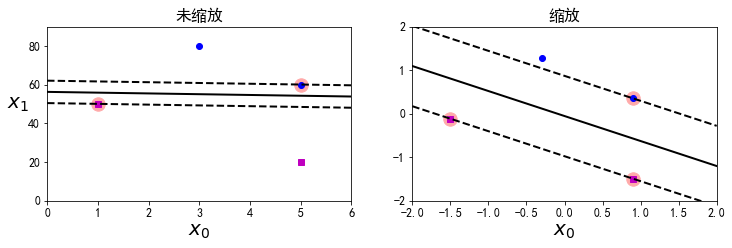

In [5]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Êú™Áº©Êîæ", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
# ÂØπÊï∞ÊçÆËøõË°åÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Áº©Êîæ", fontsize=16)
plt.axis([-2, 2, -2, 2])

ÂèØ‰ª•ÁúãËßÅÔºåSVMÂØπÁâπÂæÅÁöÑÁº©ÊîæÁâπÂà´ÊïèÊÑü„ÄÇ

## ËΩØÈó¥ÈöîÂàÜÁ±ª

Â¶ÇÊûúÊàë‰ª¨‰∏•Ê†ºÂú∞ËÆ©ÊâÄÊúâÂÆû‰æãÈÉΩ‰∏çÂú®Ë°óÈÅì‰∏äÔºåËøôÂ∞±ÊòØÁ°¨Èó¥ÈöîÂàÜÁ±ªÔºåËøô‰ºöÈÄ†Êàê‰∏§‰∏™ÈóÆÈ¢òÔºö
1. È¶ñÂÖàÔºåÂÆÉÂè™ÊúâÊï∞ÊçÆÁ∫øÊÄßÂèØÂàÜÁöÑÊó∂ÂÄôÊâçÊúâÊïà„ÄÇ
1. ÂÖ∂Ê¨°ÔºåÂØπ‰∫éÂºÇÂ∏∏ÂÄºÁâπÂà´ÊïèÊÑü„ÄÇ

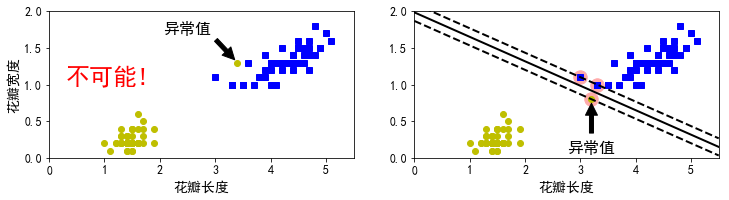

In [6]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "‰∏çÂèØËÉΩ!", fontsize=24, color="red")
plt.xlabel("Ëä±Áì£ÈïøÂ∫¶", fontsize=14)
plt.ylabel("Ëä±Áì£ÂÆΩÂ∫¶", fontsize=14)
plt.annotate("ÂºÇÂ∏∏ÂÄº",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Ëä±Áì£ÈïøÂ∫¶", fontsize=14)
plt.annotate("ÂºÇÂ∏∏ÂÄº",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

Â∑¶ÂõæÊ†πÊú¨Êâæ‰∏çÂá∫Á°¨Èó¥ÈöîÔºåËÄåÂè≥ËæπÊòæÁ§∫ÁöÑÂÜ≥Á≠ñËæπÁïåÂíåÊó†ÂºÇÂ∏∏ÂÄºÊó∂ÁöÑÂÜ≥Á≠ñËæπÁïå‰πüÂ§ß‰∏çÁõ∏Âêå„ÄÇ
<br>‰∏∫‰∫ÜÈÅøÂÖçËøô‰∫õÈóÆÈ¢òÔºåÊàë‰ª¨ÂÖÅËÆ∏‰∏ÄÈÉ®ÂàÜÂÆû‰æãÂú®Èó¥ÈöîÂÜÖÔºåËøôÂ∞±ÊòØËΩØÈó¥ÈöîÂàÜÁ±ª„ÄÇ
<br>Âú®sklearn‰∏≠ÔºåÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáË∂ÖÂèÇÊï∞CÊù•ÊéßÂà∂Ëøô‰∏™Âπ≥Ë°°ÔºåCÂÄºË∂äÂ∞èÔºåÂàôÈó¥ÈöîË∂äÂÆΩÔºåËÄåÈó¥ÈöîËøù‰æã‰πü‰ºöË∂äÂ§ö„ÄÇÂèç‰πãÔºåCË∂äÂ§ßÔºåË∂äÂ∞ë„ÄÇ

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# ËØªÂèñÊï∞ÊçÆÔºåÂπ∂ÊèêÂèñËä±Áì£ÈïøÂ∫¶ÂíåÂÆΩÂ∫¶ÁâπÂæÅ
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
# ‰∫åÂàÜÁ±ª
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
# ÊûÑÂª∫ÂàÜÁ±ªÂô®ÈÄöÈÅìÔºåÂÖàÊ†áÂáÜÂåñÔºåÁÑ∂ÂêéËøáËΩØÈó¥Èöî C‰∏∫1 loss‰∏∫hingeÁöÑsvcÁ∫øÊÄßÂàÜÁ±ªÂô®
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [9]:
scaler = StandardScaler()
# ÊûÑÂª∫‰∏§‰∏™svcÁ∫øÊÄßÂàÜÁ±ªÂô®Ôºå‰∏Ä‰∏™C‰∏∫1 ‰∏Ä‰∏™C‰∏∫100
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [10]:
# Convert to unscaled parameters
# Â∞ÜÊ†áÂáÜÂåñÁöÑÂèÇÊï∞ËΩ¨Âåñ‰∏∫Êú™Ê†áÂáÜÂåñÁöÑ
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

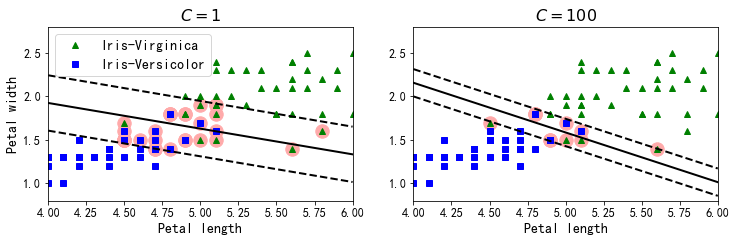

In [11]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
# ÁîªÊï∞ÊçÆÁÇπ
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
# ÁîªsvcÁöÑÂÜ≥Á≠ñËæπÁïå
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

‰∏äÈù¢Êàë‰ª¨ÂØπÁº©ÊîæÁöÑÊï∞ÊçÆÔºåËÆ≠ÁªÉ‰∫ÜSVMÊ®°Âûã(‰ΩøÁî®‰∫ÜLinearSVCÁ±ª,C=1Âíå100Ôºåloss‰ΩøÁî®<i>hingeÊçüÂ§±ÂáΩÊï∞</i>)
<br>Ê≠§Â§ñÔºåÊàë‰ª¨ËøòÂèØ‰ª•ÈááÁî®SVCÁ±ª `SVC(kernel="linear),C=1`,‰ΩÜÊòØËøôË¶ÅÊÖ¢ÁöÑÊâÄÔºåÂ∞§ÂÖ∂ÊòØÂØπ‰∫éÂ§ßÂûãÊï∞ÊçÆÈõÜÔºåÂõ†Ê≠§‰∏çÊé®Ëçê„ÄÇ
<br>Âè¶‰∏Ä‰∏™ÈÄâÊã©ÊòØ`SGDClassifier(loss='hinge',alpha=1/(m*C))`ÔºåÈÄÇÁî®‰∫éÂ∏∏ËßÑÊ¢ØÂ∫¶‰∏ãÈôç„ÄÇ‰ªñ‰∏ç‰ºöÂÉèLinearSVCÈÇ£Ê†∑Âø´ÈÄüÊî∂ÊïõÔºå‰ΩÜÊòØÂØπ‰∫éÂÜÖÂ≠òÂ§ÑÁêÜ‰∏ç‰∫ÜÁöÑÂ§ßÂûãÊï∞ÊçÆÈõÜ(Ê†∏Â§ñËÆ≠ÁªÉ)ÊàñÊòØÂú®Á∫øÂàÜÁ±ªÔºåËøôÂæàÊúâÊïà„ÄÇ

# ÈùûÁ∫øÊÄßSVMÂàÜÁ±ª

ËôΩÁÑ∂Âú®ËÆ∏Â§öÊÉÖÂÜµ‰∏ãÔºåÁ∫øÊÄßSVMÂàÜÁ±ªÂô®ÊòØÊúâÊïàÁöÑÔºåËÄå‰∏îÈÄöÂ∏∏Âá∫‰∫∫ÊÑèÊñôÁöÑÂè∑Ôºå‰ΩÜÊòØÊ≤°ÊúâÂæàÂ§öÊï∞ÊçÆÈõÜËøú‰∏çÊòØÁ∫øÊÄßÂèØÂàÜÁöÑ„ÄÇÂ§ÑÁêÜÈùûÁ∫øÊÄßÊï∞ÊçÆÈõÜÈùûÊñπÊ≥ï‰πã‰∏ÄÊòØÊ∑ªÂä†Êõ¥Â§öÁöÑÁâπÂæÅÔºåÊØîÂ¶ÇÈù¢ÂØπ‰∏ãÈù¢Â∑¶ÂõæÁöÑÊï∞ÊçÆÔºåÊòæÁÑ∂ÊòØÁ∫øÊÄß‰∏çÂèØÂàÜÁöÑ„ÄÇ‰ΩÜÊòØÂ¶ÇÊûúÊàë‰ª¨Ê∑ªÂä†Á¨¨‰∫å‰∏™ÁâπÂæÅ$x_2=(x_1)^2$,ÁîüÊàêÁöÑ2DÊï∞ÊçÆÂàôÂÆåÂÖ®Á∫øÊÄßÂèØÂàÜÁ¶ª„ÄÇ

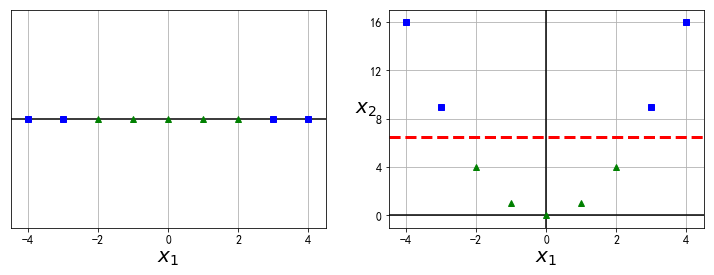

In [12]:
# y=0
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
# y=x^2
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
# ÂùêÊ†áËΩ¥
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
# ÁîªÁ∫¢Á∫ø
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

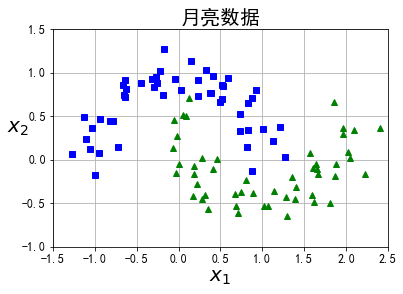

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.title("Êúà‰∫ÆÊï∞ÊçÆ",fontsize=20)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        # Â∞ÜÊ∫êÊï∞ÊçÆ Êò†Â∞ÑÂà∞ 3Èò∂Â§öÈ°πÂºè
        ("poly_features", PolynomialFeatures(degree=3)),
        # Ê†áÂáÜÂåñ
        ("scaler", StandardScaler()),
        # SVCÁ∫øÊÄßÂàÜÁ±ªÂô®
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

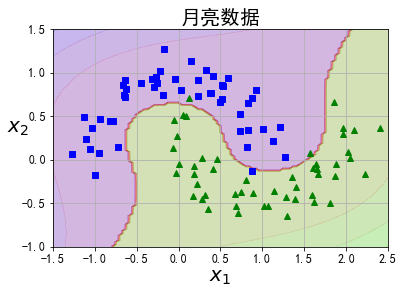

In [15]:
def plot_predictions(clf, axes):
    # ÊâìË°®
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
#     print(y_pred)
#     print(y_decision)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Â§öÈ°πÂºèÊ†∏

Ê∑ªÂä†Â§öÈ°πÂºèÁâπÂæÅÂÆûÁé∞Ëµ∑Êù•ÈùûÂ∏∏ÁÆÄÂçïÔºåÂπ∂‰∏îÂØπÊâÄÊúâÊú∫Âô®Â≠¶‰π†ÁÆóÊ≥ï(‰∏çÂè™ÊòØSVM)ÈÉΩÈùûÂ∏∏ÊúâÊïàÔºå‰ΩÜÊòØÈóÆÈ¢òÊòØÔºåÂ¶ÇÊûúÂ§öÈ°πÂºèÂ§™‰ΩéÈò∂ÔºåÂ§ÑÁêÜ‰∏ç‰∫ÜÈùûÂ∏∏Â§çÊùÇÁöÑÊï∞ÊçÆÈõÜÔºåËÄåÈ´òÈò∂‰ºöÂØºËá¥ÂàõÈÄ†Âá∫Â§ßÈáèÁâπÂæÅÔºåÂØºËá¥Ê®°ÂûãÂèòÂæóÂ§™ÊÖ¢„ÄÇ
<br>Âπ∏ËøêÁöÑÊòØ,SVMÊúâ‰∏Ä‰∏™È≠îÊúØËà¨ÁöÑÊï∞Â≠¶ÊäÄÂ∑ßÔºåÈÇ£Â∞±ÊòØÊ†∏ÊäÄÂ∑ß(Á®çÂêéËß£Èáä)„ÄÇÂÆÉ‰∫ßÁîüÁªìÊûúÂíå‰∏äÈù¢Ê∑ªÂä†ÁöÑÂ§öÈ°πÂºèÊò†Â∞Ñ‰∏ÄÊ†∑Ôºå‰ΩÜÊòØÂπ∂‰∏çÊòØÁúüÁöÑÊ∑ªÂä†„ÄÇÁî±‰∫éÂπ∂Ê≤°ÊúâÂÆûÈôÖÁöÑÊ∑ªÂä†ÔºåÊâÄ‰ª•‰πüÂ∞±‰∏çÂ≠òÂú®Êï∞ÈáèÁàÜÁÇ∏ÁöÑÁªÑÂêàÁâπÂæÅ‰∫Ü„ÄÇ

In [16]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [17]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

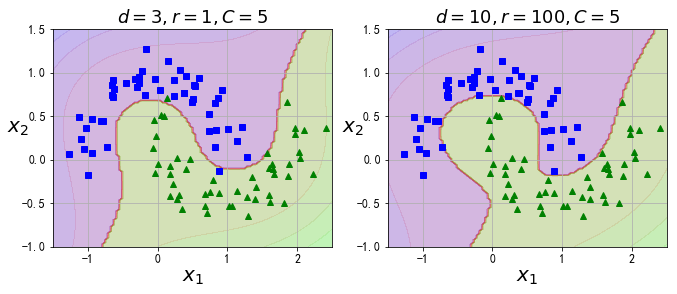

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

Â∑¶Ëæπ‰ΩøÁî®‰∫Ü3Èò∂Â§öÈ°πÂºèÂÜÖÊ†∏ËÆ≠ÁªÉSVMÂàÜÁ±ªÂô®ÔºåÂè≥Ëæπ‰ΩøÁî®‰∫Ü10Èò∂Â§öÈ°πÂºèÊ†∏„ÄÇÊòæÁÑ∂ÔºåÂ¶ÇÊûúÊ®°ÂûãËøáÊãüÂêàÔºåÊàë‰ª¨Â∫îËØ•Èôç‰ΩéÂ§öÈ°πÂºèÈò∂Êï∞ÔºåÂèçËøáÊù•Â¶ÇÊûúÊãüÂêà‰∏çË∂≥Â∞±ÂèØ‰ª•Â∞ùËØïÊèêÂçá„ÄÇË∂ÖÂèÇÊï∞`coefo`ÊéßÂà∂ÁöÑÊòØÊ®°ÂûãÂèóÈ´òÈò∂Â§öÈ°πÂºèËøòÊòØ‰ΩéÈò∂Â§öÈ°πÂºèÂΩ±ÂìçÁöÑÁ®ãÂ∫¶„ÄÇ

## Ê∑ªÂä†Áõ∏‰ººÁâπÂæÅ

Ëß£ÂÜ≥ÈùûÁ∫øÊÄßÈóÆÈ¢òÁöÑÂè¶‰∏ÄÁßçÊäÄÊúØÊòØÊ∑ªÂä†Áõ∏‰ººÁâπÂæÅ

È´òÊñØRBF:
$$\phi\gamma(x,l)=exp(-\gamma||x-l||^2)$$

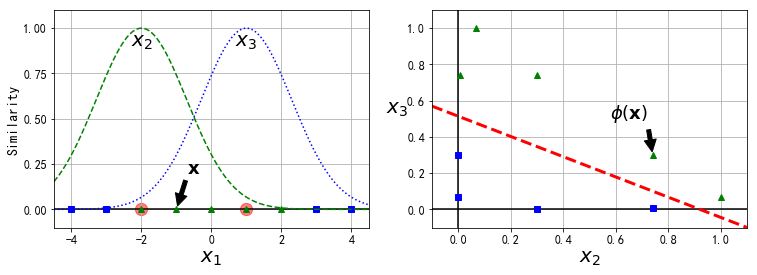

In [19]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
# Ê†πÊçÆÂú∞Ê†áËÆ°ÁÆóË∑ùÁ¶ªÔºåÁÑ∂ÂêéÁî®‰∏äÈù¢ÁöÑÂÖ¨ÂºèÊù•ËΩ¨Âåñ„ÄÇ
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# ‰ΩøÁî®‰∏ÄÁª¥Êï∞ÊçÆËΩ¨ÂåñÂêéÁöÑÊï∞ÊçÆÈõÜÊù•ÂÅö‰∏∫ÁâπÂæÅ
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
# ÁîªÈ´òÊñØÂàÜÂ∏É
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

‰Ω†Áúã‰ºöÈóÆËØ•Â¶Ç‰ΩïÈÄâÊã©Âú∞Ê†áÂë¢ÔºüÊúÄÁÆÄÂçïÁöÑÊñπÂºèÊòØÊ†πÊçÆÊï∞ÊçÆÈáåÁöÑÊØè‰∏Ä‰∏™ÂÆû‰æãÁöÑ‰ΩçÁΩÆ‰∏äÂàõÂª∫‰∏Ä‰∏™Âú∞Ê†áÔºå‰ΩÜËøô‰ºöÂàõÈÄ†ËÆ∏Â§öÁª¥Â∫¶ÔºåÂõ†Ê≠§‰πüÂ¢ûÂä†‰∫ÜËΩ¨Êç¢ÂêéÁöÑËÆ≠ÁªÉÈõÜÁ∫øÊÄßÂèØÂàÜÁ¶ªÁöÑÊú∫‰ºö„ÄÇ
<br>Áº∫ÁÇπÊòØÔºå‰∏Ä‰∏™Êúâm‰∏™ÂÆû‰æãn‰∏™ÁâπÂæÅÁöÑËÆ≠ÁªÉÈõÜ‰ºöË¢´ËΩ¨Êç¢Êàêm‰∏™ÂÆû‰æãm‰∏™ÁâπÂæÅÁöÑËÆ≠ÁªÉÈõÜ(ÂÅáËÆæÊäõÂºÉ‰∫ÜÂéüÂßãÁâπÂæÅ)„ÄÇÂ¶ÇÊûúËÆ≠ÁªÉÈõÜÈùûÂ∏∏Â∫ûÂ§ßÔºåÈÇ£‰πàÂ∞±‰ºöÂæóÂà∞ÂêåÊ†∑Â§ßÊï∞ÈáèÁöÑÁâπÂæÅ„ÄÇ

## È´òÊñØRBFÊ†∏ÂáΩÊï∞

‰∏éÂ§öÈ°πÂºèÁâπÂæÅ‰∏ÄÊ†∑ÔºåÁõ∏‰ººÁâπÂæÅÊ≥ï‰πüÂèØ‰ª•ÂèØ‰ª•ËøêÁî®Êú∫Âô®Â≠¶‰π†Ê†∏ÊäÄÂ∑ßÔºåËøôÊ†∑Ôºå‰πüÂ∞±‰∏çÈúÄË¶ÅËÆ°ÁÆóÂá∫ÊâÄÊúâÈôÑÂä†ÁâπÂæÅÔºåÂáèÂ∞èËÆ°ÁÆó‰ª£‰ª∑ÔºåÂêåÊó∂‰πüÂíåÊ∑ªÂä†‰∫ÜËÆ∏Â§öÁõ∏‰ººÁâπÂæÅ‰∏ÄÊ†∑„ÄÇ

In [20]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [21]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

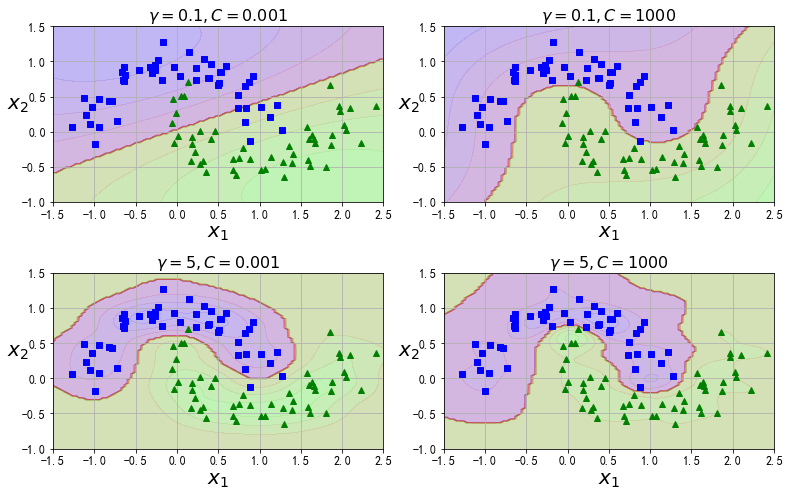

In [22]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.tight_layout()
plt.show()

‰∏äÂõæÊòæÁ§∫‰∫ÜË∂ÖÂèÇÊï∞gammaÂíåC‰ΩøÁî®‰∏çÂêåÂÄºÊó∂ÁöÑÊ®°ÂûãÔºåÂ¢ûÂä†gammaÂÄº‰ºö‰ΩøÈíüÂûãÊõ≤Á∫øÂèòÂæóÊõ¥Á™ÑÔºåÂõ†Ê≠§ÊØè‰∏™ÂÆû‰æãÁöÑÂΩ±ÂìçËåÉÂõ¥Èöè‰πãÂèòÂ∞èÔºõÂÜ≥Á≠ñËæπÁïåÂèòÂæóÊõ¥‰∏çËßÑÂàôÔºåÂºÄÂßãÂõ¥ÁªïÁùÄÂçï‰∏™ÂÆû‰æãÁªïÂºØ„ÄÇÂèçËøáÊù•ÔºåÂáèÂ∞ègammaÂÄº‰ΩøÈíüÂΩ¢Êõ≤Á∫øÂèòÂæóÊõ¥ÂÆΩÔºåÂõ†Ê≠§ÊØè‰∏™ÂÆû‰æãÁöÑÂΩ±ÂìçËåÉÂõ¥Â¢ûÂ§ßÔºåÂÜ≥Á≠ñËæπÁïåÂèòÂæóÊõ¥Âπ≥Âù¶„ÄÇÊâÄ‰ª•ÔºågammaÂ∞±ÂÉèÊòØ‰∏Ä‰∏™Ê≠£ÂàôÂåñÁöÑË∂ÖÂèÇÊï∞:<b>Ê®°ÂûãËøáÂ∫¶ÊãüÂêàÔºåÂ∞±Èôç‰ΩéÂÆÉÁöÑÂÄºÔºåÂ¶ÇÊûúÊãüÂêà‰∏çË∂≥ÂàôÊèêÂçáÂÆÉÁöÑÂÄº„ÄÇ</b>

ËøòÊúâ‰∏Ä‰∫õÂÖ∂‰ªñËæÉÂ∞ëÁî®Âà∞ÁöÑÊ†∏ÂáΩÊï∞Ôºå‰æãÂ¶Ç‰∏ìÈó®ÈíàÂØπÁâπÂÆöÊï∞ÊçÆÁªìÊûÑÁöÑÊ†∏ÂáΩÊï∞„ÄÇÂ≠óÁ¨¶‰∏≤Ê†∏Â∏∏Áî®‰∫éÊñáÊú¨ÊñáÊ°£ÊàñÊòØDNAÂ∫èÂàó(Â¶Ç‰ΩøÁî®Â≠óÁ¨¶‰∏≤Â≠êÂ∫èÂàóÊ†∏ÊàñÊòØÂü∫‰∫éËé±ÊñáÊñØÂù¶Ë∑ùÁ¶ªÁöÑÊ†∏ÂáΩÊï∞)ÁöÑÂàÜÁ±ª„ÄÇ

ÊúâËøô‰πàÂ§öÁöÑÊ†∏ÂáΩÊï∞ÔºåËØ•Â¶Ç‰ΩïÂÜ≥ÂÆö‰ΩøÁî®Âì™‰∏Ä‰∏™Âë¢ÔºüÊúâ‰∏Ä‰∏™ÁªèÈ™åÊ≥ïÂàôÊòØÔºåÊ∞∏ËøúÂÖà‰ªéÁ∫øÊÄßÊ†∏ÂáΩÊï∞ÂºÄÂßãÂ∞ùËØï(Ë¶ÅËÆ∞‰ΩèÔºålinearSVCÊØîSVC(kernel="linear)Âø´ÂæóÂ§ö)ÔºåÁâπÂà´ÊòØËÆ≠ÁªÉÈõÜÈùûÂ∏∏Â§ßÊàñÁâπÂæÅÈùûÂ∏∏Â§öÁöÑÊó∂ÂÄô„ÄÇ
<br>Â¶ÇÊûúËÆ≠ÁªÉÈõÜ‰∏çÂ§™Â§ßÔºå‰Ω†ÂèØ‰ª•ËØïËØïÈ´òÊñØRBFÊ†∏ÔºöÂ§ßÂ§öÊï∞ÊÉÖÂÜµ‰∏ãÂÆÉÈÉΩÈùûÂ∏∏Â•ΩÁî®ÔºåÂ¶ÇÊûúÊó∂Èó¥Â§öÔºåÂèØ‰ª•ÈááÁî®‰∫§ÂèâÈ™åËØÅÂíåÁΩëÊ†ºÊêúÁ¥¢Êù•Â∞ùËØï‰∏Ä‰∫õÂÖ∂‰ªñÁöÑÊ†∏ÂáΩÊï∞„ÄÇ

## ËÆ°ÁÆóÂ§çÊùÇÂ∫¶

liblinearÂ∫ì‰∏∫Á∫øÊÄßSVMÂÆûÁé∞‰∫Ü‰∏Ä‰∏™‰ºòÂåñÁÆóÊ≥ï,LinearSVCÊ≠£ÊòØÂü∫‰∫éËØ•Â∫ìÁöÑ„ÄÇËøô‰∏™ÁÆóÊ≥ï‰∏çÊîØÊåÅÊ†∏ÊäÄÂ∑ßÔºå‰∏çËøáÂÆÉ‰∏éËÆ≠ÁªÉÂÆû‰æãÁöÑÊï∞ÈáèÂíåÁâπÂæÅÊï∞ÈáèÂá†‰πéÂëàÁ∫øÊÄßÁõ∏ÂÖ≥ÔºöÂÖ∂Êó∂Èó¥Â§çÊùÇÂ∫¶Â§ßËá¥‰∏∫$O(m\times n)$„ÄÇ
<br>Â¶ÇÊûú‰Ω†ÊÉ≥Ë¶ÅÈùûÂ∏∏È´òÁöÑÁ≤æÂ∫¶ÔºåÁÆóÊ≥ïÈúÄË¶ÅÁöÑÊó∂Èó¥Êõ¥Èïø„ÄÇÂÆÉÁî±ÂÆπÂ∑ÆÂèÇÊï∞tolÊù•ÊéßÂà∂Ôºå‰∏çËøáÂ§ßÂ§öÊï∞ÂàÜÁ±ª‰ªªÂä°‰∏≠ÔºåÈªòËÆ§ÁöÑÂÆπÂ∑ÆÂ∞±Â§ü‰∫Ü„ÄÇ
<br>SVCÂàôÊòØÂü∫‰∫élibsvmÂ∫ìÁöÑÔºåËøô‰∏™Â∫ìÁöÑÁÆóÊ≥ïÊîØÊåÅÊ†∏ÊäÄÂ∑ß„ÄÇËÆ≠ÁªÉÊó∂Èó¥Â§çÊùÇÂ∫¶ÈÄöÂ∏∏Âú®O(m^2xn)ÂíåO(m^3xn)‰πãÈó¥„ÄÇÂæà‰∏çÂπ∏ÔºåËøôÊÑèÂë≥ÁùÄÂ¶ÇÊûúËÆ≠ÁªÉÂÆû‰æãÁöÑÊï∞ÈáèÂèòÂ§ß(‰æãÂ¶Ç‰∏äÂçÅ‰∏á‰∏™ÂÆû‰æã),ÂÆÉÂ∞Ü‰ºöÊÖ¢ÁöÑÂèØÊÄïÔºåÊâÄ‰ª•Ëøô‰∏™ÁÆóÊ≥ïÂÆåÁæéÈÄÇÁî®‰∫éÂ§çÊùÇ‰ΩÜÊòØ‰∏≠Â∞èÂûãÁöÑËÆ≠ÁªÉÈõÜ„ÄÇ‰ΩÜÊòØÔºåÂÆÉËøòÊòØÂèØ‰ª•ËâØÂ•ΩÂæóÈÄÇÂ∫îÁâπÂæÅÊï∞ÈáèÁöÑÂ¢ûÂä†ÔºåÁâπÂà´ÊòØÂ∫îÂØπÁ®ÄÁñèÁâπÂæÅ„ÄÇÂú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÁÆóÊ≥ïÂ§çÊùÇÂ∫¶Â§ßËá¥‰∏éÂÆû‰æãÁöÑÂπ≥ÂùáÈùûÈõ∂ÁâπÂæÅÊï∞ÊàêÊ≠£ÊØî‰æã„ÄÇ

|Á±ª|Êó∂Èó¥Â§çÊùÇÂ∫¶|ÊòØÂê¶ÊîØÊåÅÊ†∏Â§ñ|ÊòØÂê¶ÈúÄË¶ÅÁº©Êîæ|Ê†∏ÊäÄÂ∑ß|
|-|-|-|-|-|
|LinearSVC|O(mxn)|Âê¶|ÊòØ|Âê¶|
|SGDClassifier|O(mxn)|ÊòØ|ÊòØ|Âê¶|
|SVC|O(m^2xn)Âà∞O(m^3xn)|Âê¶|ÊòØ|ÊòØ|

# SVMÂõûÂΩí

Ê≠£Â¶ÇÂâçÈù¢ÊèêÂà∞ÔºåSVMÁÆóÊ≥ïÈùûÂ∏∏ÂÖ®Èù¢ÔºöÂÆÉ‰∏ç‰ªÖ‰ªÖÊîØÊåÅÁ∫øÊÄßÂíåÈùûÁ∫øÊÄßÂàÜÁ±ªÔºåËÄå‰∏îËøòÊîØÊåÅÁ∫øÊÄßÂíåÈùûÁ∫øÊÄßÂõûÂΩí„ÄÇËØÄÁ™çÂú®‰∫éÔºå‰∏çÂÜçÊòØÂ∞ùËØïÊãüÂêà‰∏§‰∏™Á±ªÂà´‰πãÈó¥ÂèØËÉΩÁöÑÊúÄÂÆΩÁöÑË°óÈÅìÁöÑÂêåÊó∂ÈôêÂà∂Èó¥ÈöîËøù‰æãÔºåSVMÂõûÂΩíË¶ÅÂÅöÁöÑÊòØÂ∞ΩÂèØËÉΩËÆ©Â§öÁöÑÂÆû‰æã‰Ωç‰∫éË°óÈÅì‰∏äÔºåÂêåÊó∂ÈôêÂà∂‰∏çÂú®Ë°óÈÅì‰∏äÁöÑÂÆû‰æã„ÄÇË°óÈÅìÂÆΩÂ∫¶Áî±epsilonÊéßÂà∂„ÄÇ

In [24]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [25]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [26]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

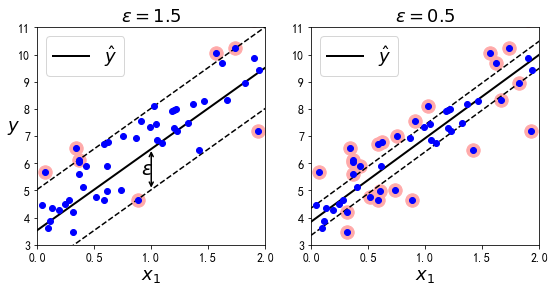

In [27]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Âú®Èó¥ÈöîÂÜÖÊ∑ªÂä†Êõ¥Â§öÁöÑÂÆû‰æã‰∏ç‰ºöÂΩ±ÂìçÊ®°ÂûãÁöÑÈ¢ÑÊµãÔºåÊâÄ‰ª•Ëøô‰∏™Ê®°ÂûãÂèàË¢´Áß∞‰∏∫epsilon‰∏çÊïèÊÑü„ÄÇ

In [29]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [30]:
from sklearn.svm import SVR
# gamma ÈªòËÆ§‰∏∫ scale Âú® 0.22 ‰∏∫‰∫ÜÂæóÂà∞Âíå‰π¶‰∏ä‰∏ÄÊ†∑ÁöÑÊïàÊûúÔºåËÆæ‰∏∫auto
# scaleÈÄÇÂêàÊú™ÁªèËøáÊ≠£ÂàôÂåñÁöÑÊï∞ÊçÆ
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

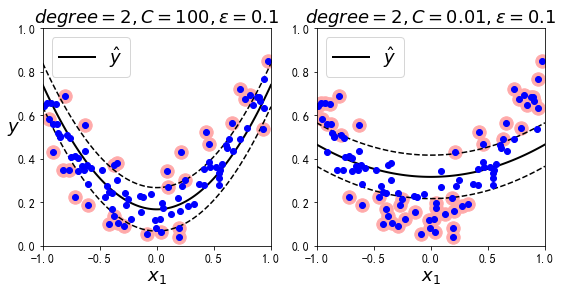

In [32]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

Ë¶ÅËß£ÂÜ≥ÈùûÁ∫øÊÄßÂõûÂΩíÁöÑ‰ªªÂä°ÔºåÂèØ‰ª•‰ΩøÁî®Ê†∏ÂåñÁöÑSVMÊ®°ÂûãÔºåÂ∑¶ÂõæÂá†‰πéÊ≤°ÊúâÊ≠£ÂàôÂåñÔºåÂè≥ÂõæÂàôËøáÂ∫¶Ê≠£ÂàôÂåñ„ÄÇSVRÊòØSVCÁöÑÂõûÂΩíÁ≠â‰ª∑Á±ªÔºålinearSVR‰πüÊòØlinearSVCÁöÑÂõûÂΩíÁ≠â‰ª∑Á±ª„ÄÇLinearSVR‰∏éËÆ≠ÁªÉÈõÜÁöÑÂ§ßÂ∞èÁ∫øÊÄßÁõ∏ÂÖ≥ÔºåËÄåSVRÂàôÂú®ËÆ≠ÁªÉÈõÜÂèòÂ§ßÊó∂ÔºåÂèòÂæóÂæàÊÖ¢(SVC‰πüÊòØ‰∏ÄÊ†∑)„ÄÇ

SVMÂºÇÂ∏∏ÂÄºÊ£ÄÊµãüå∞ Êù•Ê∫ê‰∫éÂÆòÁΩë
https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html

Automatically created module for IPython interactive environment


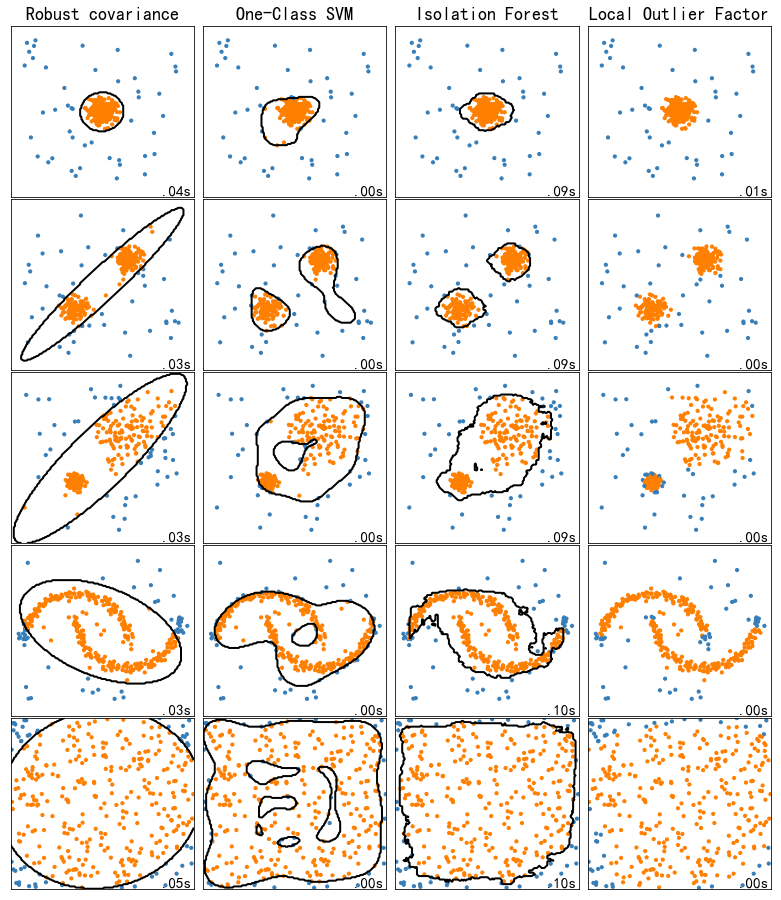

In [36]:
# import time

# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt

# from sklearn import svm
# from sklearn.datasets import make_moons, make_blobs
# from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor

# print(__doc__)

# matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# # Example settings
# n_samples = 300
# outliers_fraction = 0.15
# n_outliers = int(outliers_fraction * n_samples)
# n_inliers = n_samples - n_outliers

# # define outlier/anomaly detection methods to be compared
# # ÂõõÁßçÂºÇÂ∏∏ÂÄºÊ£ÄÊµãÁÆóÊ≥ï
# anomaly_algorithms = [
#     ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
#     ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
#                                       gamma=0.1)),
#     ("Isolation Forest", IsolationForest(behaviour='new',
#                                          contamination=outliers_fraction,
#                                          random_state=42)),
#     ("Local Outlier Factor", LocalOutlierFactor(
#         n_neighbors=35, contamination=outliers_fraction))]

# # Define datasets
# blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
# # ‰∫îÁßçÊï∞ÊçÆ
# datasets = [
#     make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
#                **blobs_params)[0],
#     make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
#                **blobs_params)[0],
#     make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
#                **blobs_params)[0],
#     4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
#           np.array([0.5, 0.25])),
#     14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# # Compare given classifiers under given settings
# xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
#                      np.linspace(-7, 7, 150))

# plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
#                     hspace=.01)

# plot_num = 1
# rng = np.random.RandomState(42)

# for i_dataset, X in enumerate(datasets):
#     # Add outliers
#     X = np.concatenate([X, rng.uniform(low=-6, high=6,
#                        size=(n_outliers, 2))], axis=0)

#     for name, algorithm in anomaly_algorithms:
#         t0 = time.time()
#         algorithm.fit(X)
#         t1 = time.time()
#         plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
#         if i_dataset == 0:
#             plt.title(name, size=18)

#         # fit the data and tag outliers
#         # ÁâπÊÆäÂ§ÑÁêÜ
#         if name == "Local Outlier Factor":
#             y_pred = algorithm.fit_predict(X)
#         else:
#             y_pred = algorithm.fit(X).predict(X)

#         # plot the levels lines and the points
#         # ËøΩËá≥ËæπÁïå
#         if name != "Local Outlier Factor":  # LOF does not implement predict
#             Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = Z.reshape(xx.shape)
#             plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

#         colors = np.array(['#377eb8', '#ff7f00'])
#         plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

#         plt.xlim(-7, 7)
#         plt.ylim(-7, 7)
#         plt.xticks(())
#         plt.yticks(())
#         plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
#                  transform=plt.gca().transAxes, size=15,
#                  horizontalalignment='right')
#         plot_num += 1

# plt.show()

# Â∑•‰ΩúÂéüÁêÜ

Êú¨ËäÇÂ∞Ü‰ºö‰ªãÁªçSVMÂ¶Ç‰ΩïËøõË°åÈ¢ÑÊµãÔºå‰ª•ÂèäËÆ≠ÁªÉÁÆóÊ≥ïÊòØÂ¶Ç‰ΩïÂ∑•‰ΩúÁöÑÁöÑÔºåÊàë‰ª¨‰ºö‰ªéÁ∫øÊÄßSVMÂºÄÂßã„ÄÇÂ¶ÇÊûúÊòØÂàöÂàöÂºÄÂßãÊé•Ëß¶Êú∫Âô®Â≠¶‰π†ÔºåÂèØ‰ª•ÂÆâÂÖ®Âú∞Ë∑≥ËøáÊú¨ËäÇÔºåÁõ¥Êé•ËøõÂÖ•Êú¨Á´†Êú´Â∞æÁöÑÁªÉ‰π†ÔºåÁ≠âÂà∞ÊÉ≥Ë¶ÅÊõ¥Ê∑±ÂÖ•Âú∞‰∫ÜËß£SVMÊó∂ÂÜçÂõûÊù•‰πü‰∏çËøü„ÄÇ
<br>È¶ñÂÖàÔºåËØ¥Êòé‰∏Ä‰∏ãÁ¨¶Âè∑ÔºöÂÅèÁΩÆÈ°πË°®Á§∫‰∏∫bÔºåÁâπÂæÅÊùÉÈáçÂêëÈáèË°®Á§∫‰∏∫w„ÄÇÂêåÊó∂ËæìÂÖ•ÁâπÂæÅÂêëÈáè‰∏≠‰∏çÊ∑ªÂä†ÂÅèÊâßÁâπÂæÅ„ÄÇ

##  ÂÜ≥Á≠ñÂáΩÊï∞ÂíåÈ¢ÑÊµã

Á∫øÊÄßSVMÂàÜÁ±ªÂô®ÈÄöËøáÁÆÄÂçïÁöÑËÆ°ÁÆóÂÜ≥Á≠ñÂáΩÊï∞Á∫øÊÄßÊñπÁ®ãÊù•ÂØπÊñ∞ÂÆû‰æãËøõË°åÈ¢ÑÊµã„ÄÇ
<br>Á∫øÊÄßSVMÁ∫øÊÄßÂàÜÁ±ªÂô®È¢ÑÊµã
$$
(\hat{y})=
\begin{cases}
0 & if & w^T\cdot x+b<0,\\
1 & if & w^T\cdot x+b\ge0
\end{cases}
$$

In [40]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

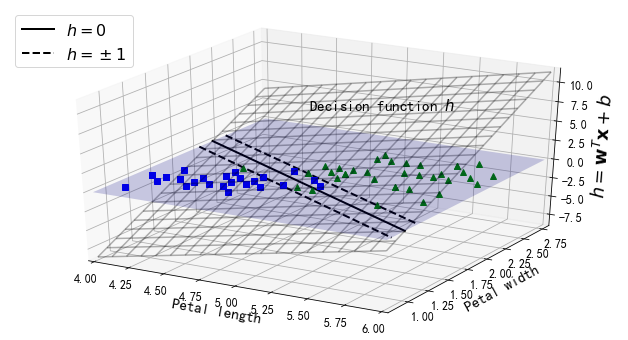

In [42]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

‰∏äÂõæÊòæÁ§∫‰∫ÜÊ®°ÂûãÊâÄÂØπÂ∫îÁöÑÂÜ≥Á≠ñÂáΩÊï∞:Êï∞ÊçÆÈõÜÂåÖÂê´‰∏§‰∏™ÁâπÂæÅ(Ëä±Áì£ÂÆΩÂ∫¶ÂíåÈïøÂ∫¶),ÊâÄ‰ª•ÊòØ‰∏Ä‰∏™‰∫åÁª¥Âπ≥Èù¢„ÄÇÂÜ≥Á≠ñËæπÁïåÊòØÂÜ≥Á≠ñÂáΩÊï∞Á≠â‰∫é0ÁöÑÁÇπÁöÑÈõÜÂêà:ÂÆÉÊòØ‰∏§‰∏™Âπ≥Èù¢ÁöÑ‰∫§ÈõÜÔºå‰πüÂ∞±ÊòØ‰∏ÄÊù°Á∫ø(Âä†Á≤óÂÆûÁé∞)„ÄÇ
ÂΩìÊúân‰∏™ÁâπÂæÅÁöÑÊó∂ÂÄôÔºåÂÜ≥Á≠ñÂáΩÊï∞ÊòØ‰∏Ä‰∏™nÁª¥Ë∂ÖÂπ≥Èù¢ÔºåÂÜ≥Á≠ñËæπÁïåÊòØ‰∏Ä‰∏™(n-1)Áª¥ÁöÑË∂ÖÂπ≥Èù¢„ÄÇ
<br>ËôöÁ∫øË°®Á§∫ÂÜ≥Á≠ñÂáΩÊï∞Á≠â‰∫é1Êàñ-1ÁöÑÁÇπÔºöÂÆÉ‰ª¨‰∫íÁõ∏Âπ≥Ë°åÔºåÂπ∂‰∏î‰∏éÂÜ≥Á≠ñËæπÁïåÁöÑË∑ùÁ¶ªÁõ∏Á≠âÔºå‰ªéËÄåÂΩ¢Êàê‰∏Ä‰∏™Èó¥Èöî„ÄÇËÆ≠ÁªÉÁ∫øÊÄßSVMÂàÜÁ±ªÂô®ÊÑèÂë≥ÁùÄÊâæÂà∞wÂíåbÁöÑÂÄºÔºå‰ªéËÄå‰ΩøËøô‰∏™Èó¥ÈöîÂ∞ΩÂèØËÉΩÂÆΩÁöÑÂêåÊó∂ÔºåÈÅøÂÖçÁ°¨Èó¥ÈöîÊàñÊòØËΩØÈó¥ÈöîÈó¥ÈöîËøù‰æã„ÄÇ

# ËÆ≠ÁªÉÁõÆÊ†á

ÊÄùËÄÉ‰∏Ä‰∏ãÂÜ≥Á≠ñÂáΩÊï∞ÁöÑÊñúÁéáÔºåÂÆÉÁ≠â‰∫éÊùÉÈáçÂêëÈáèÁöÑËåÉÊï∞,Âç≥||w||„ÄÇÂ¶ÇÊûúÊàë‰ª¨Â∞ÜÊñúÁéáÈô§‰ª•2ÔºåÈÇ£‰πàÂÜ≥Á≠ñÂáΩÊï∞Á≠â‰∫é+1 -1 ÁöÑÁÇπ‰πüÂ∞ÜÂèòÂæóÁ¶ªÂÜ≥Á≠ñÂáΩÊï∞‰∏§ÂÄçËøú„ÄÇ‰πüÂ∞±ÊòØËØ¥ÔºåÂ∞ÜÊñúÁéáÈô§‰ª•2ÔºåÂ∞Ü‰ºöÊòØÈó¥Èöî‰πò‰ª•2.

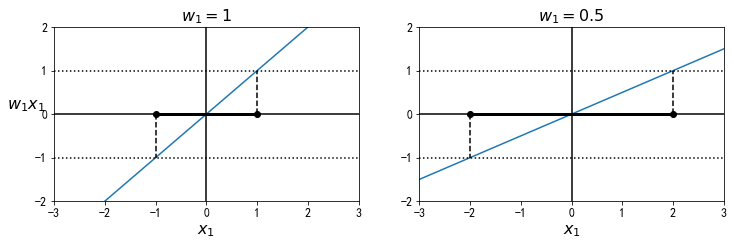

In [43]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

ÊâÄ‰ª•Êàë‰ª¨Ë¶ÅÊúÄÂ∞èÂåñ||w||Êù•Â∞ΩÂèØËÉΩÂæóÂà∞Â∞ΩÂèØËÉΩÂ§ßÁöÑÈó¥Èöî„ÄÇ‰ΩÜÊòØÔºåÂ¶ÇÊûúÊàë‰ª¨Ë¶ÅÊÉ≥ÈÅøÂÖç‰ªª‰ΩïÈó¥ÈöîËøù‰æã(Á°¨Èó¥Èöî),ÈÇ£‰πàÂ∞±Ë¶Å‰ΩøÊâÄÊúâÊ≠£Á±ªËÆ≠ÁªÉÈõÜÁöÑÂÜ≥Á≠ñÂáΩÊï∞Â§ß‰∫é1ÔºåË¥üÁ±ªËÆ≠ÁªÉÈõÜÁöÑÂÜ≥Á≠ñÂáΩÊï∞Â∞è‰∫é-1„ÄÇ
<br>Á°¨Èó¥ÈöîÁ∫øÊÄßSVMÂàÜÁ±ªÂô®ÁöÑÁõÆÊ†á
$$
\underset{w,b}{min}\frac{1}{2}w^T\cdot w
$$
$$
s.t\  t^{(i)}(w^T \cdot x^{(i)}+b) \ge1(i=1,2,...,m)
$$
Âõ†Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•Â∞ÜÁ°¨Èó¥ÈöîÁ∫øÊÄßSVMÂàÜÁ±ªÂô®ÁöÑÁõÆÊ†áÔºåÁúãÂÅö‰∏Ä‰∏™Á∫¶Êùü‰ºòÂåñÈóÆÈ¢ò„ÄÇ

Ë¶ÅËææÂà∞ËΩØÈó¥ÈöîÁöÑÁõÆÊ†áÔºåÊàë‰ª¨ÈúÄË¶ÅÂú®Ê≠§Âü∫Á°Ä‰∏äÂºïÂÖ•‰∏Ä‰∏™ÊùæÂºõÂèòÈáèzetaÔºåÊùæÂºõÂèòÈáèzetaË°°ÈáèÁöÑÊòØÁ¨¨i‰∏™ÂÆû‰æãÂ§öÂ§ßÁ®ãÂ∫¶‰∏äÂÖÅËÆ∏Èó¥ÈöîËøù‰æã„ÄÇ
<br>Áé∞Âú®Êàë‰ª¨Êúâ‰∫Ü‰∏§‰∏™‰∫íÁõ∏ÂÜ≤Á™ÅÁöÑÁõÆÊ†á:ÊòØÊùæÂºõÂèòÈáèË∂äÂ∞èË∂äÂ•Ω‰ªéËÄåÂáèÂ∞èÈó¥ÈöîËøù‰æãÔºåÂêåÊó∂ËøòË¶Å‰Ωø1/2*W^TWÊúÄÂ∞èÂåñ‰ª•Â¢ûÂ§ßÈó¥Èöî„ÄÇËÄåËøôÊ≠£ÊòØË∂ÖÂèÇÊï∞CÁöÑÁî®Ê≠¶‰πãÂú∞ÔºöÂÖÅËÆ∏Êàë‰ª¨Âú®‰∏§‰∏™ÁõÆÊ†á‰πãÈó¥ÊùÉË°°„ÄÇ
<br>ËΩØÈó¥ÈöîÁ∫øÊÄßSVMÂàÜÁ±ªÂô®ÁõÆÊ†á
$$
\underset{w,b}{min}\frac{1}{2}w^T\cdot w + C\sum_{i=1}^{m}\zeta^{(i)}
$$
$$
s.t\  t^{(i)}(w^T \cdot x^{(i)}+b) \ge1-\zeta^{(i)}\ and\ \zeta^{i}\ge0(i=1,2,...,m)
$$

## ‰∫åÊ¨°ËßÑÂàí

Á°¨Èó¥ÈöîÂíåËΩØÈó¥ÈöîÈóÆÈ¢òÈÉΩÂ±û‰∫éÁ∫øÊÄßÁ∫¶ÊùüÁöÑÂá∏‰∫åÊ¨°‰ºòÂåñÈóÆÈ¢òÔºåËøôÁ±ªÈóÆÈ¢òË¢´Áß∞‰∏∫‰∫åÊ¨°ËßÑÂàí(QP)ÈóÆÈ¢ò„ÄÇË¶ÅËß£ÂÜ≥‰∫åÊ¨°ËßÑÂàíÈóÆÈ¢òÂèàÂæàÂ§öÁé∞ÊàêÁöÑÊ±ÇËß£Âô®Ôºå‰ΩøÁî®Âà∞ÁöÑÊäÄÊúØÂêÑ‰∏çÁõ∏ÂêåÔºåËøô‰∫õ‰∏çÂú®Êú¨‰π¶ÁöÑËÆ®ËÆ∫ËåÉÂõ¥‰πãÂÜÖ
<br>‰∫åÊ¨°ËßÑÂàíÈóÆÈ¢òÁöÑ‰∏ÄËà¨ÂΩ¢Âºè
$$
\underset{P}{min}\frac{1}{2}P^T\cdot H \cdot P + f^T \cdot P
$$
$$
s.t\ A\cdot p \leq b 
$$
$$
\begin{cases}
PÊòØ‰∏Ä‰∏™n_pÁª¥ÂêëÈáè(n_p‰∏∫ÂèÇÊï∞Êï∞Èáè)\\
HÊòØ‰∏Ä‰∏™n_p\times n_pÁü©Èòµ\\
fÊòØ‰∏Ä‰∏™n_pÁª¥ÂêëÈáè\\
AÊòØ‰∏Ä‰∏™n_c\times n_pÁü©Èòµ(n_c‰∏∫Á∫¶ÊùüÂêëÈáè)\\
bÊòØ‰∏Ä‰∏™n_cÁª¥ÂêëÈáè
\end{cases}
$$

## ÂØπÂÅ∂ÈóÆÈ¢ò

ÈíàÂØπ‰∏Ä‰∏™ÁªôÂÆöÁöÑÁ∫¶Êùü‰ºòÂåñÈóÆÈ¢òÔºåÁß∞‰πã‰∏∫ÂéüÂßãÈóÆÈ¢òÔºåÊàë‰ª¨Â∏∏Â∏∏ÂèØ‰ª•Áî®Âè¶‰∏Ä‰∏™‰∏çÂêåÁöÑÔºå‰ΩÜÊòØ‰∏é‰πãÂØÜÂàáÁõ∏ÂÖ≥ÁöÑÈóÆÈ¢òÊù•Ë°®ËææÔºåËøô‰∏™ÈóÆÈ¢òÊàë‰ª¨Áß∞‰πã‰∏∫ÂØπÂÅ∂ÈóÆÈ¢ò„ÄÇÈÄöÂ∏∏Êù•ËØ¥ÔºåÂØπÂÅ∂ÈóÆÈ¢òÁöÑËß£Âè™ËÉΩÁÆóÊòØÂéüÂßãÈóÆÈ¢òÁöÑËß£ÁöÑ‰∏ãÈôêÔºå‰ΩÜÊòØÂú®Êüê‰∫õÊÉÖÂÜµ‰∏ãÔºåÂÆÉ‰πüÂèØËÉΩË∑üÂéüÂßãÈóÆÈ¢òÁöÑËß£ÂÆåÂÖ®Áõ∏Âêå„ÄÇÂπ∏ËøêÁöÑÊòØÔºåSVMÈóÆÈ¢òÂàöÂ•ΩÊª°Ë∂≥Ëøô‰∫õÊù°‰ª∂ÔºåÊâÄ‰ª•Êàë‰ª¨ÂèØ‰ª•ÈÄâÊã©ÊòØËß£ÂéüÂßãÈóÆÈ¢òËøòÊòØÂØπÂÅ∂ÈóÆÈ¢òÔºå‰∫åËÄÖËß£Áõ∏Âêå„ÄÇ
<br>Á∫øÊÄßSVMÁõÆÊ†áÁöÑÂØπÂÅ∂ÈóÆÈ¢ò
$$
\underset{\alpha}{min}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)T}x^{(j)}-\sum_{i=1}^{m}\alpha^{(i)}
$$
$$
s.t\ \alpha^{(i)}\ge0\ (i=1,2,...,m) 
$$

ÂØπÂÅ∂ÈóÆÈ¢òÁöÑÂéüÂßãÈóÆÈ¢ò
$$
\hat{w}=\sum_{i=1}^{m}\alpha^{(i)}t^{(i)}x^{(i)}\\
\hat{b}=\frac{1}{n_s}\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}(1-t^{(i)}(\hat{w}^T\cdot x^{(i)}))
$$

## Ê†∏ÂåñSVM

ÂÅáËÆæÊàë‰ª¨ÊÉ≥Ë¶ÅÂ∞Ü‰∏Ä‰∏™‰∫åÈò∂Â§öÈ°πÂºèËΩ¨Êç¢‰∏∫‰∏Ä‰∏™‰∫åÈò∂ËÆ≠ÁªÉÈõÜ(‰æãÂ¶ÇÊúà‰∫ÆËÆ≠ÁªÉÈõÜ),ÁÑ∂ÂêéÂú®ËΩ¨Êç¢ËÆ≠ÁªÉÈõÜ‰∏äËÆ≠ÁªÉÁ∫øÊÄßSVMÂàÜÁ±ªÂô®„ÄÇËøô‰∏™‰∫åÈò∂Â§öÈ°πÂºèÁöÑÊò†Â∞ÑÂáΩÊï∞Â¶Ç‰∏ãÊâÄÁ§∫
$$
\phi(x)=\phi
\begin{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
x_1^2 \\
\sqrt{2}x_1x_2\\
x_2^2
\end{pmatrix}
$$

Ê≥®ÊÑèËΩ¨Êç¢ÂêéÁöÑÂêëÈáèÊòØ‰∏âÁª¥ËÄå‰∏çÊòØ‰∫åÁª¥ÁöÑÔºåÁé∞Âú®Êàë‰ª¨Êù•ÁúãÁúãÂ¶ÇÊûúÊàë‰ª¨Â∫îÁî®Ëøô‰∏™‰∫åÈò∂Â§öÈ°πÂºèÊò†Â∞ÑÔºå‰∏§‰∏™‰∫åÁª¥ÂêëÈáèaÂíåb‰ºöÂèëÁîü‰ªÄ‰πàÂèòÂåñÔºåÁÑ∂ÂêéËÆ°ÁÆóËΩ¨Êç¢ÂêéÁöÑ‰∏§‰∏™ÂêëÈáèÁöÑÁÇπÁßØ„ÄÇ
<br>Ê†∏ÊäÄÂ∑ßÔºö
$$
\phi(a)^T\cdot \phi(b)=
\begin{pmatrix}
a_1^2 \\
\sqrt{2}a_1a_2\\
a_2^2
\end{pmatrix}^T
\cdot
\begin{pmatrix}
b_1^2 \\
\sqrt{2}b_1b_2\\
b_2^2
\end{pmatrix}
=a_1^2b_1^2+2a_1b_1a_2b_2+a_2^2b_2^2\\
=(a_1b_1+a_2b_2)^2
=
\begin{pmatrix}
\begin{pmatrix}
a_1 \\
a_2
\end{pmatrix}^T
\begin{pmatrix}
b_1 \\
b_2
\end{pmatrix}
\end{pmatrix}
=(a^T\cdot b)^2
$$

ÂèØ‰ª•ÁúãÂà∞ËΩ¨Êç¢ÂêéÂêëÈáèÁöÑÁÇπÁßØÁ≠â‰∫éÂéüÂßãÂêëÈáèÁÇπÁßØÁöÑÂπ≥ÊñπÔºö
$
\phi(a)^T\cdot \phi(b)=(a^T\cdot b)^2
$
ËøôÂ∞±ÊòØÊ†∏ÊäÄÂ∑ßÁöÑÊú¨Ë¥®ÔºåÊàë‰ª¨Âπ∂‰∏çÈúÄË¶ÅËÆ°ÁÆóËΩ¨Êç¢ÂáΩÊï∞Ôºå‰∏äÈù¢‰πüÂè´ÂÅö‰∫åÈò∂Â§öÈ°πÂºèÊ†∏

Â∏∏Áî®ÁöÑÊ†∏ÂáΩÊï∞Ôºö
$$
\begin{array}{lcl}
Á∫øÊÄßÊ†∏ÂáΩÊï∞:K(a,b)=a^T\cdot b\\
Â§öÈ°πÂºèÊ†∏ÂáΩÊï∞:K(a,b)=(\gamma a^T\cdot b+r)^d\\
È´òÊñØRBFÊ†∏ÂáΩÊï∞:K(a,b)=exp(-\gamma ||a-b||^2)\\
SigmoidÊ†∏ÂáΩÊï∞:K(a,b)=tanh(\gamma^T\cdot b+ r)
\end{array}
$$

MercerÂÆöÁêÜ
<br>Ê†πÊçÆËøô‰∏™ÂÆöÁêÜÔºåÂ¶ÇÊûúÂáΩÊï∞K(a,b)Á¨¶Âêà
1. KËøûÁª≠
1. Âπ∂‰∏îÂèÇÊï∞‰∏äÂØπÁß∞,K(a,b)=K(b,a).Á≠âÁ≠â

ÂàôÂ≠òÂú®‰∏Ä‰∏™ÂáΩÊï∞Â∞Üa bÊò†Â∞ÑÂà∞Âè¶‰∏Ä‰∏™(ÂèØËÉΩÊõ¥È´òÁª¥ÁöÑÁ©∫Èó¥)‰ΩøÂæó
$K(a,b)=\phi(a)^T\cdot \phi(b)$
Âç≥‰ΩøÊàë‰ª¨‰∏çÁü•ÈÅìËøô‰∏™ÂáΩÊï∞ÊòØ‰ªÄ‰πàÔºå‰ΩÜËøô‰∏™ÂáΩÊï∞ËÇØÂÆöÂ≠òÂú®ÔºåÂõ†Ê≠§Êàë‰ª¨ÂèØ‰ª•Â∞ÜKÁî®‰ΩúÊ†∏ÂáΩÊï∞„ÄÇÊ≥®ÊÑèÔºå‰πüÊúâ‰∏Ä‰∫õÂ∏∏Áî®ÁöÑÊ†∏ÂáΩÊï∞(ÊØîÂ¶Çsigmoid‰∏çÊª°Ë∂≥MercerÊù°‰ª∂ÁöÑÊâÄÊúâÊù°‰ª∂)Ôºå‰ΩÜÊòØÂÆÉ‰ª¨Âú®ÂÆûË∑µ‰∏≠ÈÄöÂ∏∏‰πüË°®Áé∞‰∏çÈîô„ÄÇ

ËøòÊúâ‰∏Ä‰∏™Êú™‰∫ÜÁªìÁöÑÈóÆÈ¢òÊàë‰ª¨ÈúÄË¶ÅËØ¥ÊòéÔºåÂÖ¨Âºè
$$
\hat{w}=\sum_{i=1}^{m}\alpha^{(i)}t^{(i)}x^{(i)}\\
\hat{b}=\frac{1}{n_s}\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}(1-t^{(i)}(\hat{w}^T\cdot x^{(i)}))
$$
ÊòæÁ§∫‰∫ÜÁî®Á∫øÊÄßSVMÂàÜÁ±ªÂô®Â¶Ç‰Ωï‰ªéÂØπÂÅ∂ÈóÆÈ¢òËß£Ëµ∞Âà∞ÂéüÂßãËß£Ôºå‰ΩÜÊòØÂ¶ÇÊûúÊàë‰ª¨Â∫îÁî®‰∫ÜÊ†∏ÊäÄÂ∑ßÔºåÊúÄÁªàÂæóÂà∞ÂåÖÂê´$\varphi (x^{(i)})$ÁöÑÊñπÁ®ã„ÄÇËÄå$\hat{w}$ÁöÑÁª¥Â∫¶Êï∞ÈáèÂøÖÈ°ª‰∏é$\varphi (x^{(i)})$Áõ∏ÂêåÔºåÂêéËÄÖÂæàÂèØËÉΩÊòØÂ∑®Â§ßÁîöËá≥ÊòØÊó†Á©∑Â§ßÁöÑÔºåÊâÄ‰ª•Êàë‰ª¨Ê†πÊú¨Ê≤°Ê≥ïËÆ°ÁÆó„ÄÇÂèØÊòØ‰∏çÁü•ÈÅì$\hat{w}$ËØ•Â¶Ç‰ΩïÂÅöÂá∫È¢ÑÊµãÂë¢ÔºüÊàë‰ª¨ÂèØ‰ª•Â∞ÜÂÖ¨Âºè‰∏≠$\hat{w}$ÁöÑÂÖ¨ÂºèÊèíÂÖ•Êñ∞ÂÆû‰æãx^{(i)}ÁöÑÂÜ≥Á≠ñÂáΩÊï∞‰∏≠ÔºåËøôÊ†∑Â∞±ÂæóÂà∞‰∫Ü‰∏Ä‰∏™Âè™ÂåÖÂê´ËæìÂÖ•ÂêëÈáè‰πãÈó¥ÁöÑÁÇπÁßØÁöÑÂÖ¨Âºè„ÄÇËøôÊó∂Êàë‰ª¨Â∞±ÂèØ‰ª•ÂÜçÊ¨°ËøêÁî®Ê†∏ÊäÄÂ∑ß‰∫Ü„ÄÇ
<br>‰ΩøÁî®Ê†∏ÂåñSVMÂÅöÂá∫È¢ÑÊµã
$$
h_{\hat{w},\hat{b}}(\phi(X^{(n)}))
=\hat{W}^T\cdot \phi (X^{(n)})+\hat{b}
=(\sum_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}\phi(X^{(i)}))^T\cdot(X^{(n)})+\hat{b}\\
=\sum_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}(\phi(X^{(i)})^T\cdot \phi(X^{(n)}))+\hat{b}\\
=\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}\hat{\alpha}^{(i)}t^{(i)}K(X^{(i)},X^{(n)})+\hat{b}
$$

Ê≥®ÊÑè,Âõ†‰∏∫ÂØπ‰∫éÊîØÊåÅÂêëÈáèÊâçÊúâ$\alpha^{i}\neq0$,ÊâÄ‰ª•È¢ÑÊµãÊó∂ÔºåËÆ°ÁÆóÊñ∞ËæìÂÖ•ÂêëÈáè$x^{n}$ÁöÑÁÇπÁßØÔºå‰ΩøÁî®ÁöÑ‰ªÖ‰ªÖÊòØÊîØÊåÅÂêëÈáèÔºåËÄå‰∏çÊòØÂÖ®ÈÉ®ËÆ≠ÁªÉÂÆû‰æã„ÄÇÂΩìÁÑ∂ÔºåÊàë‰ª¨ËøòÈúÄË¶Å‰ΩøÁî®ÂêåÊ†∑ÁöÑÊäÄÂ∑ßÊù•ËÆ°ÁÆóÂÅèÁΩÆÈ°π$\hat{b}$
<br>‰ΩøÁî®Ê†∏ÊäÄÂ∑ßËÆ°ÁÆóÂÅèÁΩÆÈ°π
$$
\hat{b}=\frac{1}{n_s}\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}(1-t^{(i)}\hat{W}^T\cdot \phi(X^{(i)}))=
\frac{1}{n_s}\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}(1-t^{(i)}(\sum_{j=1}^{m}\hat{\alpha}^{(j)}t^{j}\phi(X^{j}))^T\cdot \phi(X^{(i)}))\\
=\frac{1}{n_s}\sum_{i=1\\\hat{\alpha}^{(i)}>0}^{m}(1-t^{(i)}\sum_{j=1\\\hat{\alpha}^{(j)}>0}^{m}\hat{\alpha}^{(j)}t^{j}K(X^{(i)},X^{(j)}))
$$

Â¶ÇÊûúÁé∞Âú®ÊÑüËßâÂ§¥ÁóõÔºåÂÆåÂÖ®Ê≠£Â∏∏ÔºöËøôÊ≠£ÊòØÊ†∏ÊäÄÂ∑ßÁöÑÂâØ‰ΩúÁî®„ÄÇ

## Âú®Á∫øSVM

Âú®Êú¨Á´†ÁªìÊùü‰πãÂâçÔºåÊàë‰ª¨Âø´ÈÄü‰∫ÜËß£‰∏Ä‰∏ãÂú®Á∫øSVMÂàÜÁ±ªÂô®(ÂõûÊÉ≥‰∏Ä‰∏ãÔºåÂú®Á∫øÂ≠¶‰π†ÊÑèÂë≥ÁùÄÂ¢ûÈáèÂ≠¶‰π†ÔºåÈÄöÂ∏∏Â∞±ÊòØÊñ∞ÂÆû‰æãÂà∞Êù•ÁöÑÊó∂ÂÄôÂ≠¶‰π†)„ÄÇ

ÂØπÁ∫øÊÄßSVMÂàÜÁ±ªÂô®Êù•ËØ¥ÔºåÊñπÊ≥ï‰πã‰∏ÄÊòØ‰ΩøÁî®Ê¢ØÂ∫¶‰∏ãÈôçÔºå‰Ωø‰ªéÂéüÂßãÈóÆÈ¢òÂØºÂá∫ÁöÑÊàêÊú¨ÂáΩÊï∞ÊúÄÂ∞èÂåñ„ÄÇ‰ΩÜ‰∏çÂπ∏ÁöÑÊòØÔºåËøôÁßçÊñπÊ≥ïÊî∂ÊïõÈÄüÂ∫¶ÊØî‰∫åÊ¨°ËßÑÂàíË¶ÅÊÖ¢ÁöÑÂ§ö„ÄÇ

Á∫øÊÄßSVMÂàÜÁ±ªÂô®ÁöÑÊçüÂ§±ÂáΩÊï∞Ôºö
$$
J(w,b)=\frac{1}{2}w^T\cdot w+C\sum_{i=1}^{m}max(0,1-t^{(i)}(w^T\cdot x^{(i)}+b))
$$
ÊçüÂ§±ÂáΩÊï∞‰∏≠ÁöÑÁ¨¨‰∏ÄÈ°π‰ºöÊé®Âä®Ê®°ÂûãÁöÑÂà∞‰∏Ä‰∏™ËæÉÂ∞èÁöÑÊùÉÈáçÂêëÈáèwÔºå‰ªéËÄå‰ΩøÈó¥ÈöîÊõ¥Â§ß„ÄÇÁ¨¨‰∫åÈ°πÂàô‰ºöËÆ°ÁÆóÂÖ®ÈÉ®ÁöÑÈó¥ÈöîËøù‰æã„ÄÇÂ¶ÇÊûúÊ≤°Êúâ‰∏Ä‰∏™ÂÆû‰æã‰Ωç‰∫éË°óÈÅì‰πã‰∏äÔºåÂπ∂‰∏îÈÉΩÂú®Ë°óÈÅìÊ≠£Á°ÆÁöÑ‰∏ÄËæπÔºåÈÇ£‰πàËøô‰∏™ÂÆû‰æãÁöÑÈó¥ÈöîËøù‰æã‰∏∫0ÔºõÂ¶Ç‰∏çÁÑ∂ÔºåÂàôËØ•ÂÆû‰æãÁöÑËøù‰æãÂ§ßÂ∞è‰∏éÂÖ∂Âà∞Ë°óÈÅìÊ≠£Á°Æ‰∏ÄËæπÁöÑË∑ùÁ¶ªÊàêÊ≠£ÊØî„ÄÇ
<br>ÊâÄ‰ª•Â∞ÜËøô‰∏™È°πÊúÄÂ∞èÂåñÔºåËÉΩÂ§ü‰øùËØÅÊ®°Âûã‰ΩøËøù‰æãÂ∞ΩÂèØËÉΩÂ∞èÔºå‰πüÂ∞ΩÂèØËÉΩÂ∞ë„ÄÇ

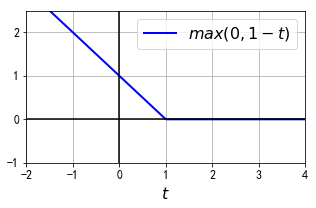

In [44]:
# HingeÊçüÂ§±ÂáΩÊï∞
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

# ÊãìÂ±ï

## 1 ËÆ≠ÁªÉÊó∂Èó¥

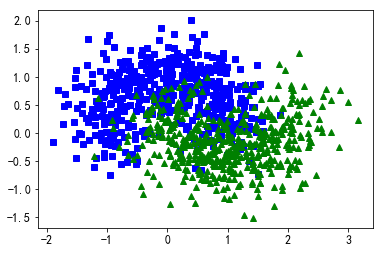

In [45]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

[LibSVM]0 0.1 0.29425549507141113
[LibSVM]1 0.01 0.3011960983276367
[LibSVM]2 0.001 0.3446023464202881
[LibSVM]3 0.0001 0.6670019626617432
[LibSVM]4 1e-05 1.0691180229187012
[LibSVM]5 1.0000000000000002e-06 0.9756641387939453
[LibSVM]6 1.0000000000000002e-07 1.0729963779449463
[LibSVM]7 1.0000000000000002e-08 1.0481781959533691
[LibSVM]8 1.0000000000000003e-09 1.0548186302185059
[LibSVM]9 1.0000000000000003e-10 1.0581846237182617


c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


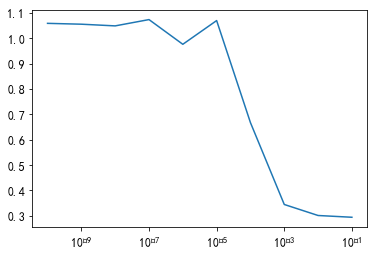

In [46]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times)

## 2.ÂØπÁ∫øÊÄßSVMÂàÜÁ±ªÂô®Â∫îÁî®ÊâπÊ¢ØÂ∫¶‰∏ãÈôç

In [47]:
# Training set
# Ëé∑ÂèñÊï∞ÊçÆ
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris-Virginica

In [48]:
from sklearn.base import BaseEstimator
# ÂÆöÂà∂SVC
class MyLinearSVC(BaseEstimator):
    # Ëé∑ÂèñÂèÇÊï∞
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
    # ËÆ≠ÁªÉËøáÁ®ã
    def fit(self, X, y):
        # Random initialization
        # Â¶ÇÊûúÈöèÊú∫Êï∞Âõ∫ÂÆö
        if self.random_state:
            np.random.seed(self.random_state)
        #ÁîüÊàênÁª¥ËÆ≠ÁªÉÂèÇÊï∞
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            # Ëé∑ÂèñÂΩìÂâçÁöÑÊîØÊåÅÂêëÈáè
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            # ËÆ°ÁÆóÂΩìÂâçÁöÑxÂíåt
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
#             ÊçüÂ§±ÂáΩÊï∞
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
#             ËÆ∞ÂΩïÊçüÂ§±
            self.Js.append(J)
#             ÊâßË°åÊ¢ØÂ∫¶ËÆ°ÁÆóÂíå‰∏ãÈôç
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

[0, 60000, 0, 100]

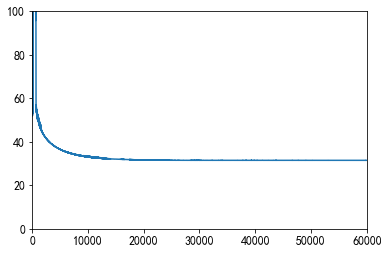

In [49]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [50]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [51]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


[4, 6, 0.8, 2.8]

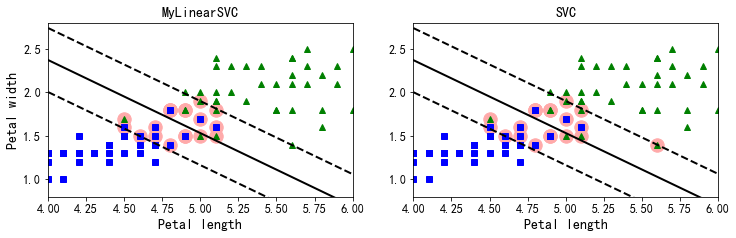

In [52]:
yr = y.ravel()
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])


[-12.46916922   1.96411117   1.74274779]


[4, 6, 0.8, 2.8]

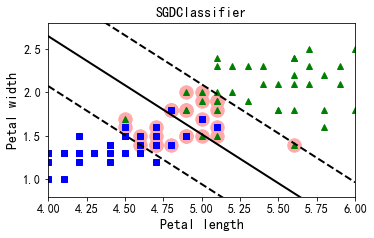

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha = 0.017, max_iter = 50, tol=-np.infty, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # -1 if t==0, +1 if t==1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])


# ÁªÉ‰π†

## 8 ÂØπÊØî LinearSVCÂíåSVCÂíåSGDClassifierÁöÑÊ®°ÂûãÁªìÊûú

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [56]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474027] [[1.0536456  1.09903032]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


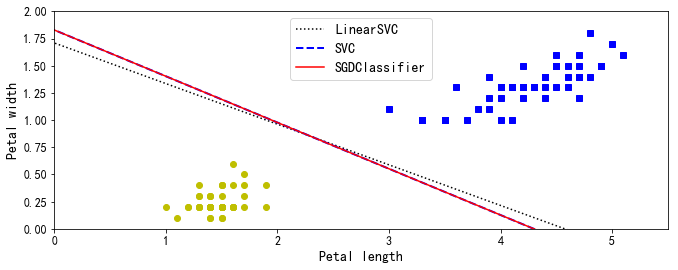

In [57]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## 9.Âú®Mnist‰∏äËÆ≠ÁªÉSVMÂàÜÁ±ªÂô®

In [58]:
# Ëé∑ÂèñËÆ≠ÁªÉÊï∞ÊçÆ
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [59]:
# ÊâìÊï£Êï∞ÊçÆÈõÜ
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [60]:
# ÂÖà‰ΩøÁî®Á∫øÊÄßSVMÂàÜÁ±ªÂô®Ôºå‰ºöËá™Âä®‰ΩøÁî® OVAÁ≠ñÁï•
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [61]:
# ËÆ°ÁÆó‰∏Ä‰∏ãÂáÜÁ°ÆÁéá
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8827333333333334

In [62]:
# ÂÖàÂØπÊï∞ÊçÆËøõË°åÊ†áÂáÜÂåñ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [63]:
# ÂÜçÊ¨°ËÆ≠ÁªÉ
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [64]:
# ÂÜçÊ¨°ËÆ°ÁÆóÂáÜÁ°ÆÁéá
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9227666666666666

In [65]:
# ÊåáÂÆö‰∏∫ OVA(one vs all)Ê®°ÂºèÔºåÂèàÁß∞‰∏∫OVR(one all rest)
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
# È¢ÑÊµãÁªìÊûú
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

In [67]:
# ÂèÇÊï∞ÊêúÁ¥¢
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3,n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto', kernel='rbf',
                                 max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D820256FD0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D820256E80>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [68]:
# ÊêúÂØªÂà∞ÁöÑÊúÄ‰Ω≥Ê®°Âûã
rnd_search_cv.best_estimator_

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
# ÊúÄ‰Ω≥ÂèÇÊï∞
rnd_search_cv.best_score_

0.864

In [70]:
# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°ÂûãÊù•ËÆ≠ÁªÉÂÖ®ÈÉ®ÂèÇÊï∞
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
# ËøõË°åÊ®°ÂûãÊÄßËÉΩ‰º∞ËÆ°
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965

In [72]:
# ÂØπÊµãËØïÈõÜËøõË°åËØÑ‰º∞
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9709

## 10.‰ΩøÁî®SVMÊù•ËÆ≠ÁªÉÂä†Â∑û‰ΩèÊàøÊï∞ÊçÆ

In [74]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [78]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9612806653297271

In [79]:
np.sqrt(mse)

0.9804492160890982

In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42,n_jobs=-1)
rnd_search_cv.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   25.6s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D820150320>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8208A82E8>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [81]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

In [83]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528746